# Producing a mock sample
White area on $\chi^2$ plot is due to underflows in erf function 

In [1]:
%run "survival_fitter.py"

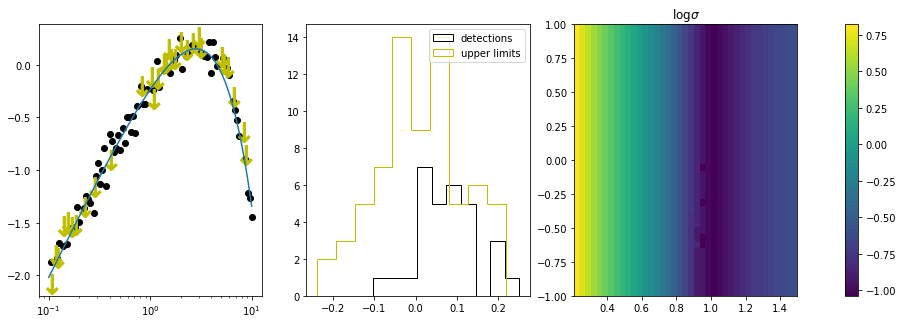

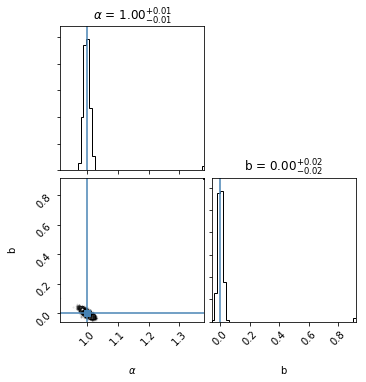

In [3]:
from scipy.optimize import minimize

def model(x,θ):
    # Fake model
    return θ[1]+np.log10(x**3./(np.exp(x/θ[0])-1))
limits = np.array([[0.01,1.5],[-1,1]])
N   = 100 # Number of fake points
ν   = np.logspace(-1,1,N) # frequency axis
νt  = np.logspace(-1,1,100) # for plotting models
Fm  = model(ν,[1.,0.]) # model evaluation
F = Fm+np.random.normal(0.,.1,N)

Δ = np.random.binomial(1,.7,N) # Detected 1, ULs 0
F[Δ==0]=F[Δ==0]+.09 # Simulating effects of upper limits

# Creating a mesh for plotting σ
θ0 = np.linspace(0.21,1.5,40)
θ1 = np.linspace(-1,1,40)
M  = np.meshgrid(θ0,θ1)
θ  = np.c_[M[0].flatten(),M[1].flatten()]
def checknan(f,θ):
    # checks if σ converges, otherwise returns inf
    try:
        return f(θ)
    except:
        return np.inf
σ_array = np.array([checknan(SED_fitting(ν,F,Δ,model, limits).constrain_σ,θθ) for θθ in θ])
σ = np.min(σ_array) # smallest σ on the mesh

f, ax = plt.subplots(1,3,figsize=(17,5))
ax[0].plot(ν[Δ==1],F[Δ==1],'ko')
ax[0].plot(ν[Δ==0],F[Δ==0],'y.',marker='$\downarrow$',ms=20)
ax[0].plot(νt,model(νt, [1.,0.]))
ax[0].set_xscale('log')
ax[1].hist(F[Δ==0]-Fm[Δ==0],10,color='k',histtype='step', label='detections')
ax[1].hist(F[Δ==1]-Fm[Δ==1],10,color='y',histtype='step',label='upper limits')
ax[1].legend()
ax[2].set_title('$\log\sigma$')
im=ax[2].pcolormesh(M[0],M[1],np.log10(σ_array).reshape(len(θ1),len(θ1)))
f.colorbar(im,ax=ax);

# MCMC
ndim, nwalkers = 2, 100

p0 = np.c_[np.random.uniform(limits[0,0],limits[0,1],nwalkers),np.random.uniform(limits[1,0],limits[1,1],nwalkers)]
S = SED_fitting(ν,F,Δ,model, limits,σ=σ)
S.do_mcmc(ndim=2, nwalkers=100, Nsteps=200, priors=p0,crop=50)
corner(S.D,50,labels=[r'$\alpha$','b'], show_titles=True,truths=[1.,0]);

# Smaller dataset

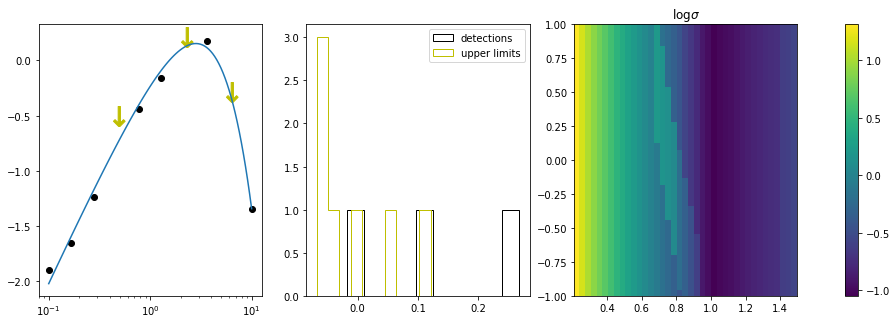

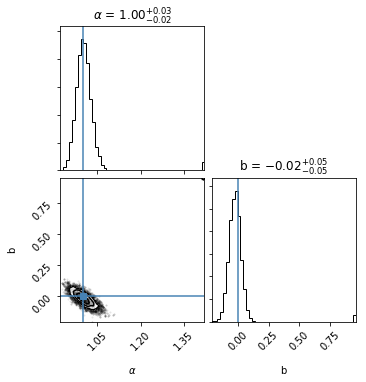

In [2]:
from scipy.optimize import minimize

def model(x,θ):
    # Fake model
    return θ[1]+np.log10(x**3./(np.exp(x/θ[0])-1))
limits = np.array([[0.01,1.5],[-1,1]])
N   = 10 # Number of fake points
ν   = np.logspace(-1,1,N) # frequency axis
νt  = np.logspace(-1,1,100) # for plotting models
Fm  = model(ν,[1.,0.]) # model evaluation
F = Fm+np.random.normal(0.,.1,N)

Δ = np.random.binomial(1,.7,N) # Detected 1, ULs 0
F[Δ==0]=F[Δ==0]+.09 # Simulating effects of upper limits

# Creating a mesh for plotting σ
θ0 = np.linspace(0.21,1.5,40)
θ1 = np.linspace(-1,1,40)
M  = np.meshgrid(θ0,θ1)
θ  = np.c_[M[0].flatten(),M[1].flatten()]
def checknan(f,θ):
    # checks if σ converges, otherwise returns inf
    try:
        return f(θ)
    except:
        return np.inf
σ_array = np.array([checknan(SED_fitting(ν,F,Δ,model, limits).constrain_σ,θθ) for θθ in θ])
σ = np.min(σ_array) # smallest σ on the mesh

f, ax = plt.subplots(1,3,figsize=(17,5))
ax[0].plot(ν[Δ==1],F[Δ==1],'ko')
ax[0].plot(ν[Δ==0],F[Δ==0],'y.',marker='$\downarrow$',ms=20)
ax[0].plot(νt,model(νt, [1.,0.]))
ax[0].set_xscale('log')
ax[1].hist(F[Δ==0]-Fm[Δ==0],10,color='k',histtype='step', label='detections')
ax[1].hist(F[Δ==1]-Fm[Δ==1],10,color='y',histtype='step',label='upper limits')
ax[1].legend()
ax[2].set_title('$\log\sigma$')
im=ax[2].pcolormesh(M[0],M[1],np.log10(σ_array).reshape(len(θ1),len(θ1)))
f.colorbar(im,ax=ax);

# MCMC
ndim, nwalkers = 2, 100

p0 = np.c_[np.random.uniform(limits[0,0],limits[0,1],nwalkers),np.random.uniform(limits[1,0],limits[1,1],nwalkers)]
S = SED_fitting(ν,F,Δ,model, limits,σ=σ)
S.do_mcmc(ndim=2, nwalkers=100, Nsteps=200, priors=p0,crop=50)
corner(S.D,50,labels=[r'$\alpha$','b'], show_titles=True,truths=[1.,0]);